In [38]:
import numpy as np
import pandas as pd
import pycaret as pt
from autoviz.classify_method import data_cleaning_suggestions,data_suggestions
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [15]:
data = pd.read_csv("C:\\Users\\sanji\\Downloads\\archive\\Obesity Classification.csv")

In [16]:
data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [17]:
data.drop("ID",axis = 1,inplace = True)

In [12]:
data.Gender = data['Gender'].apply(lambda x: 1 if x=="male" else 0)

In [13]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,0,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,0,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,0,190,100,31.2,Obese


In [14]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lab = LabelEncoder()
data['Gender'] = lab.fit_transform(data['Gender'])
data['Label'] = lab.fit_transform(data['Label'])

In [19]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


In [20]:
data.corr()

,Age,Gender,Height,Weight,BMI,Label
Age,1.000000,-0.091964,-0.076896,0.465106,0.474185,-0.134396
Gender,-0.091964,1.000000,0.876225,0.418415,0.342342,-0.281647
Height,-0.076896,0.876225,1.000000,0.428890,0.354340,-0.237683
Weight,0.465106,0.418415,0.428890,1.000000,0.972829,-0.565555
BMI,0.474185,0.342342,0.354340,0.972829,1.000000,-0.589237
Label,-0.134396,-0.281647,-0.237683,-0.565555,-0.589237,1.000000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

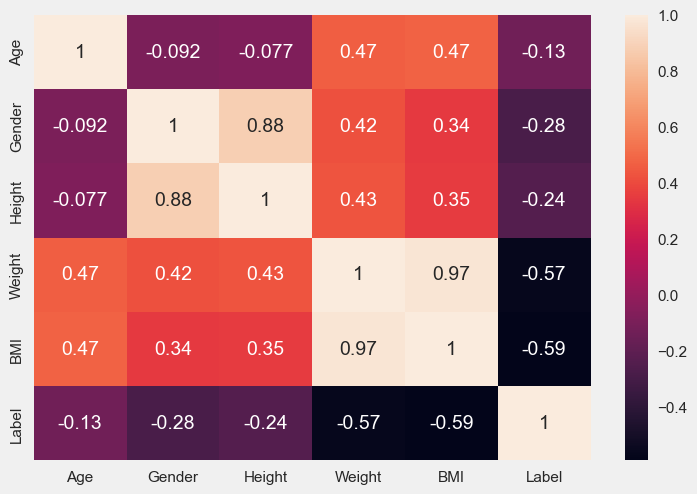

In [40]:
sns.heatmap(data.corr(),annot = True)

In [29]:
data.Label.value_counts()

3    47
0    29
2    20
1    12
Name: Label, dtype: int64

In [30]:
data_cleaning_suggestions(data)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Age,0.000000,69.444444,int64,75,0,0,
Gender,0.000000,1.851852,int32,2,0,0,
Height,0.000000,9.259259,int64,10,0,0,
Weight,0.000000,21.296296,int64,23,0,0,
BMI,0.000000,23.148148,float64,25,0,0,
Label,0.000000,3.703704,int32,4,0,0,


In [31]:
df = data
X =  df.drop('Label', axis = 1)
y = df.Label

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
sm = SMOTE(random_state = 42)
x_train_res,y_train_res = sm.fit_resample(x_train,y_train)

In [36]:
x_train_res.shape

(86, 5)

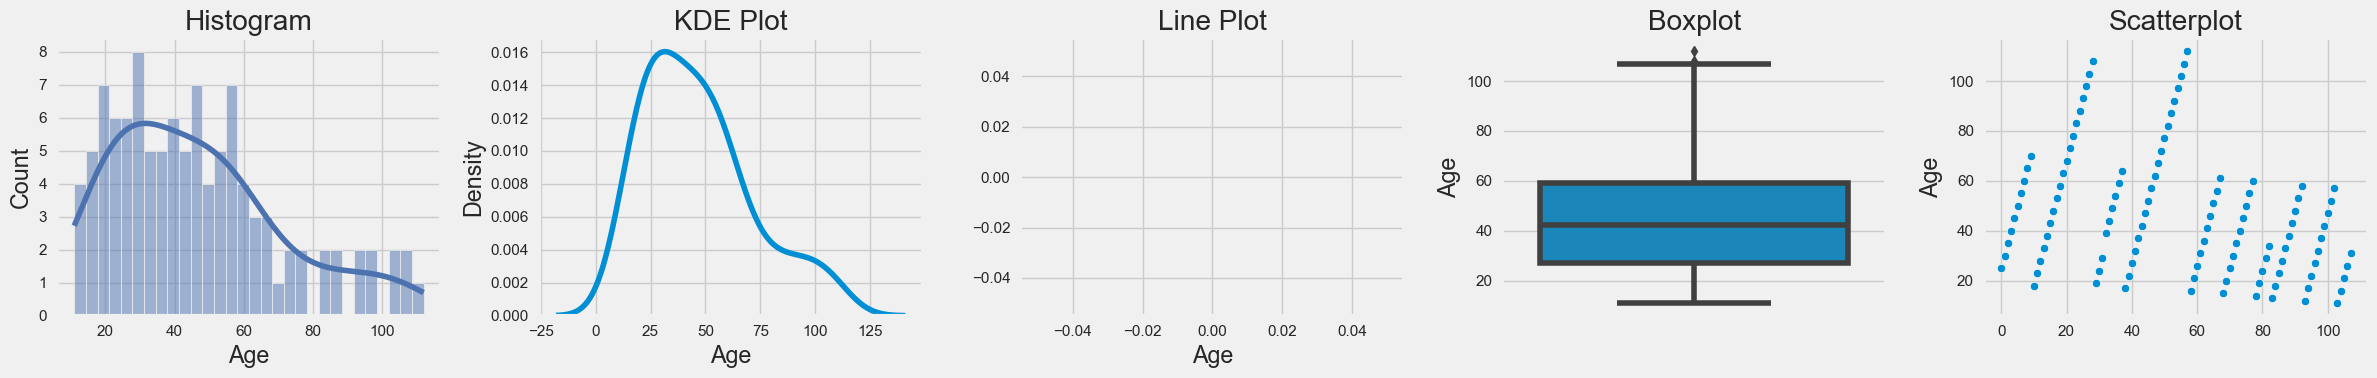

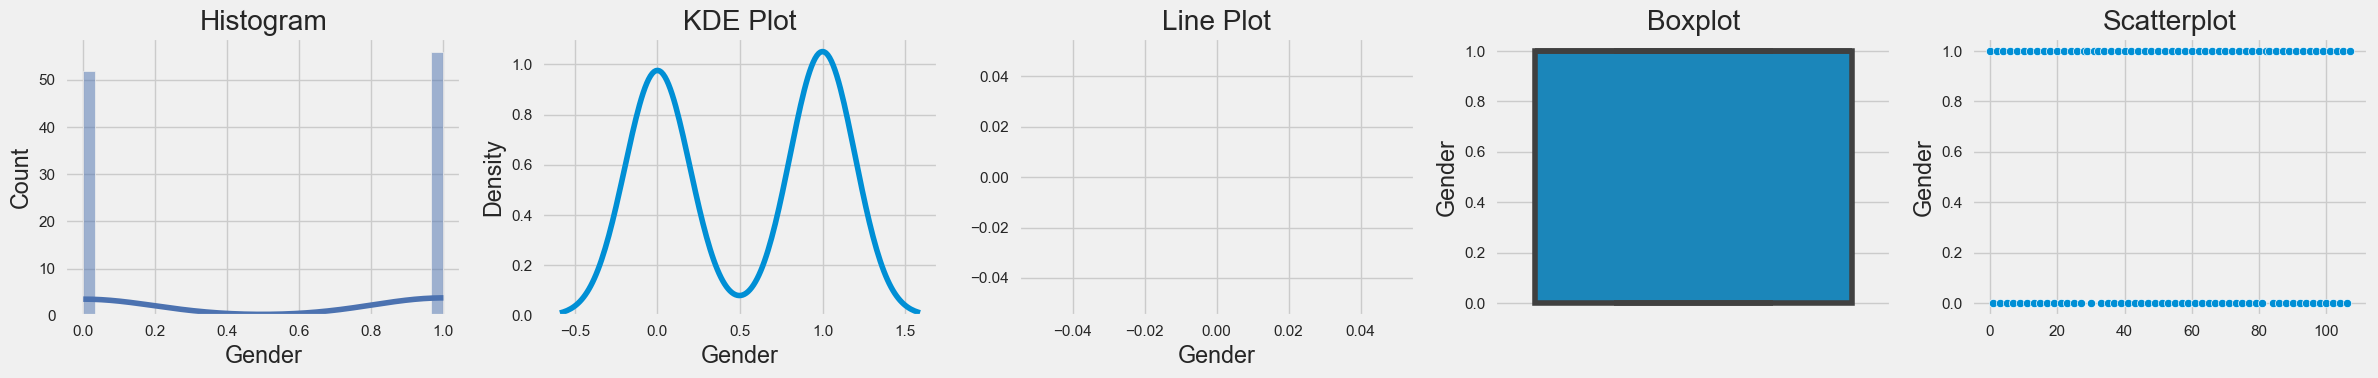

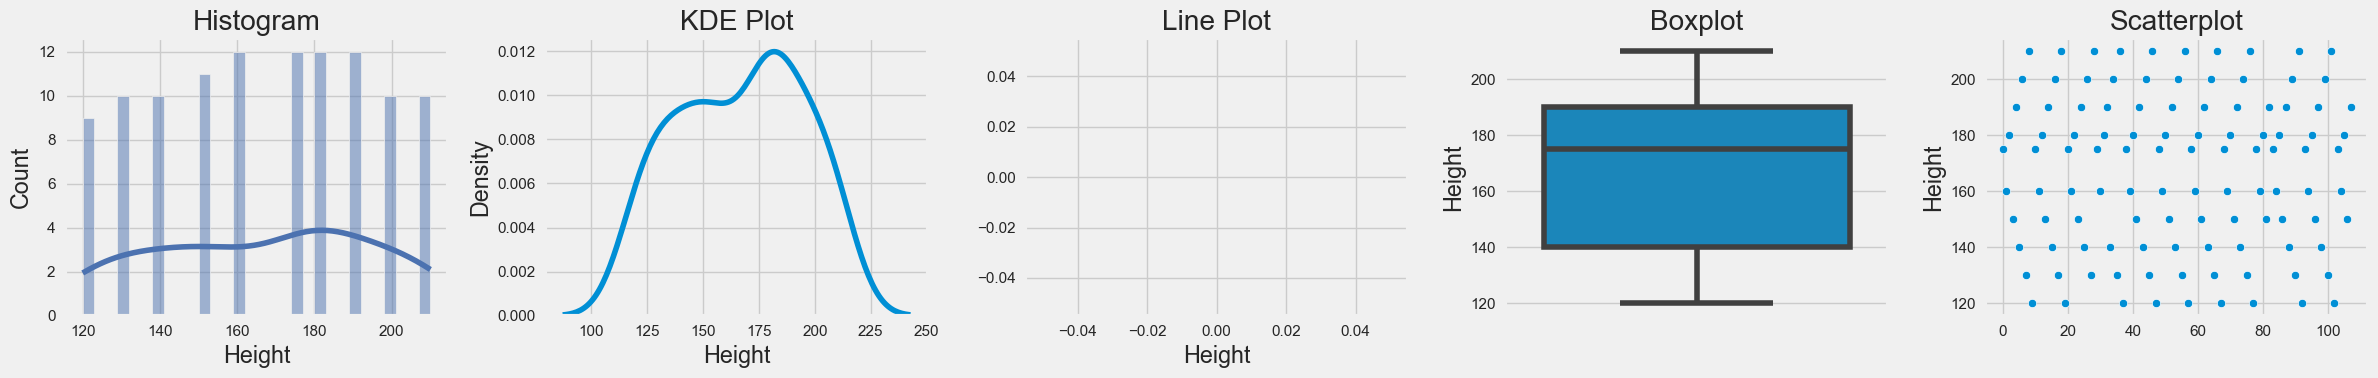

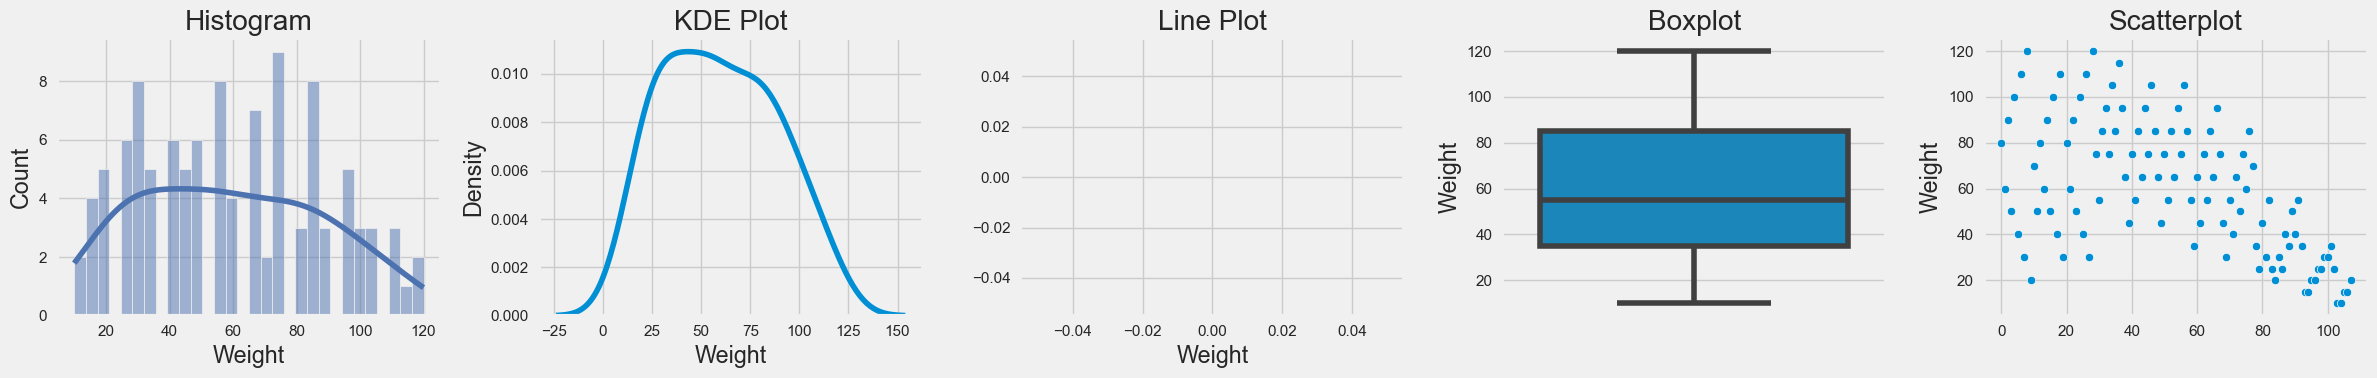

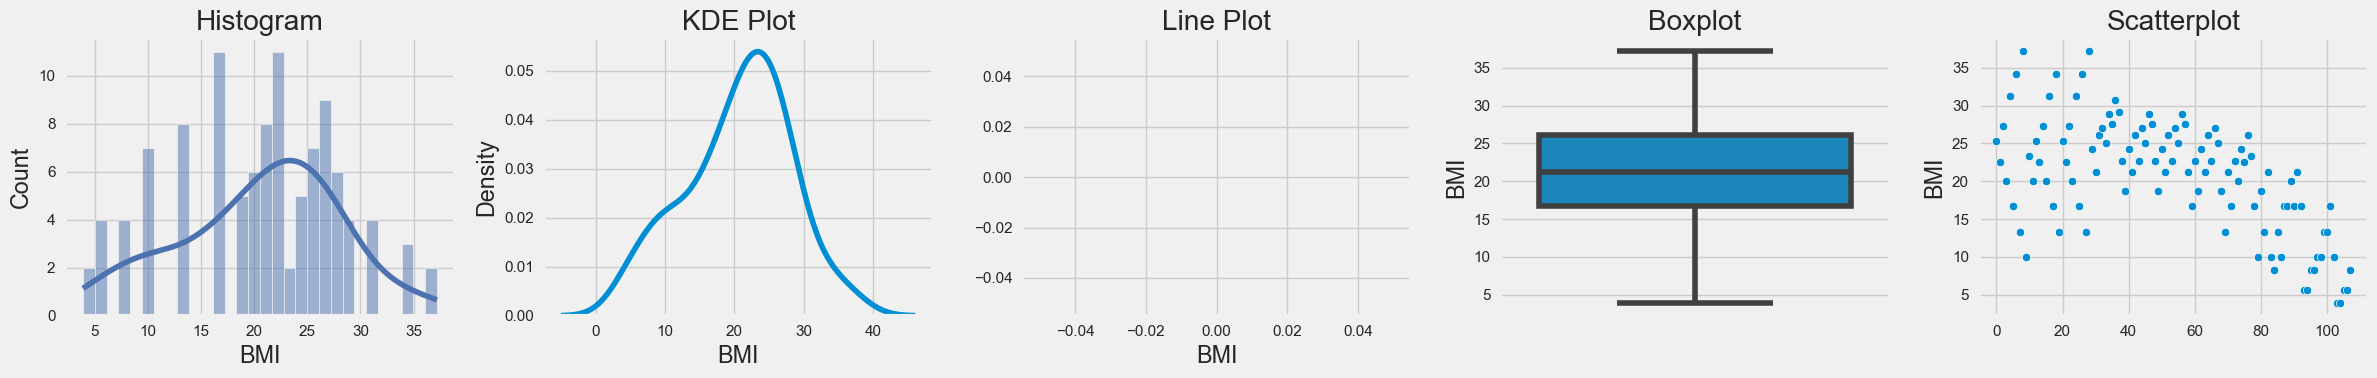

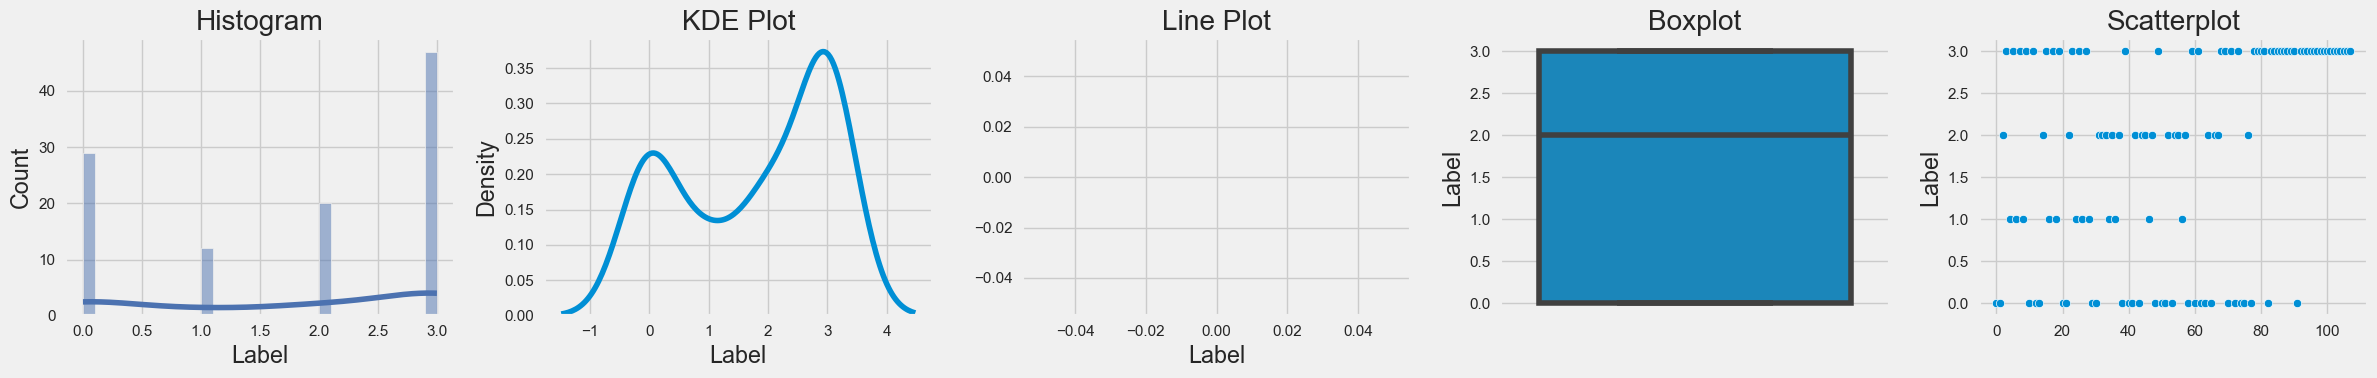

In [39]:
def plots(df, variable):
  if df[variable].dtype != object:
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    sns.lineplot(df[variable], ax=ax[2])
    ax[2].set_title('Line Plot')
    
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in df.columns:
    plots(df ,i)


In [41]:
train_data = pd.concat([x_train_res,y_train_res],axis = 1)

In [42]:
from pycaret.classification import *

In [43]:
s = setup(data = train_data,target = 'Label', session_id = 123,
         normalize = True)

,Description,Value
0,Session id,123
1,Target,Label
2,Target type,Multiclass
3,Original data shape,"(156, 6)"
4,Transformed data shape,"(156, 6)"
5,Transformed train set shape,"(109, 6)"
6,Transformed test set shape,"(47, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [44]:
pt.classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9909,1.0000,0.9909,0.9932,0.9906,0.9878,0.9888,0.2670
xgboost,Extreme Gradient Boosting,0.9818,0.9943,0.9818,0.9864,0.9813,0.9756,0.9775,0.2320
rf,Random Forest Classifier,0.9727,1.0000,0.9727,0.9795,0.9707,0.9631,0.9661,0.3020
gbc,Gradient Boosting Classifier,0.9727,0.9944,0.9727,0.9803,0.9716,0.9633,0.9663,0.5430
lightgbm,Light Gradient Boosting Machine,0.9727,0.9898,0.9727,0.9823,0.9702,0.9633,0.9679,1.3130
lr,Logistic Regression,0.9545,0.9944,0.9545,0.9667,0.9523,0.9386,0.9434,2.7310
dt,Decision Tree Classifier,0.9455,0.9632,0.9455,0.9626,0.9433,0.9263,0.9330,0.1010
lda,Linear Discriminant Analysis,0.9364,0.9943,0.9364,0.9477,0.9339,0.9142,0.9192,0.1020
knn,K Neighbors Classifier,0.8909,0.9880,0.8909,0.9186,0.8864,0.8533,0.8657,0.0540
svm,SVM - Linear Kernel,0.8718,0.0000,0.8718,0.8781,0.8595,0.8272,0.8379,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [45]:
my_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9065,0.8778,0.8877
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
predictions = predict_model(my_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [47]:
predictions

,Age,Gender,Height,Weight,BMI,Label,prediction_label,prediction_score
16,50,0,140,40,16.700001,3,3,0.98
142,43,1,195,95,27.000000,2,2,1.00
139,42,1,192,93,27.114485,2,2,0.99
47,97,1,200,95,27.000000,2,2,0.78
78,34,1,190,55,21.200001,0,0,0.84
4,62,0,120,85,27.500000,2,2,1.00
39,53,0,130,40,16.700001,3,3,0.99
129,55,1,204,111,32.465317,1,1,1.00
55,32,0,150,55,21.200001,0,0,0.89
128,62,1,210,115,34.489712,1,1,1.00


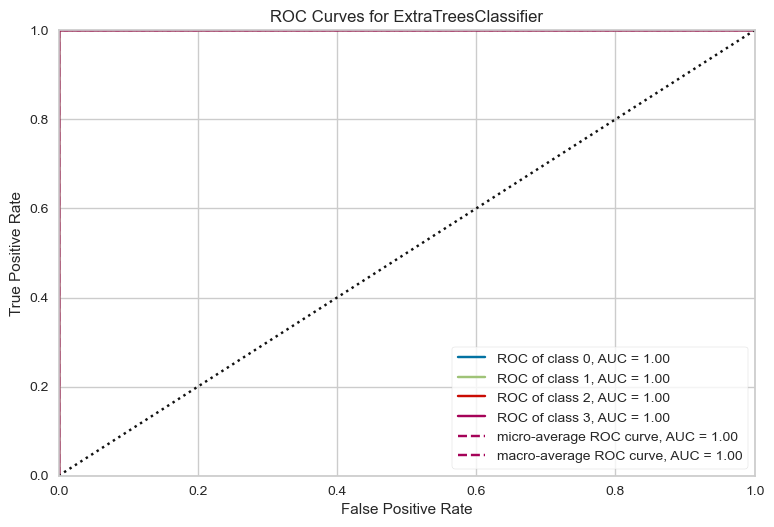

In [48]:
plot_model(my_model)

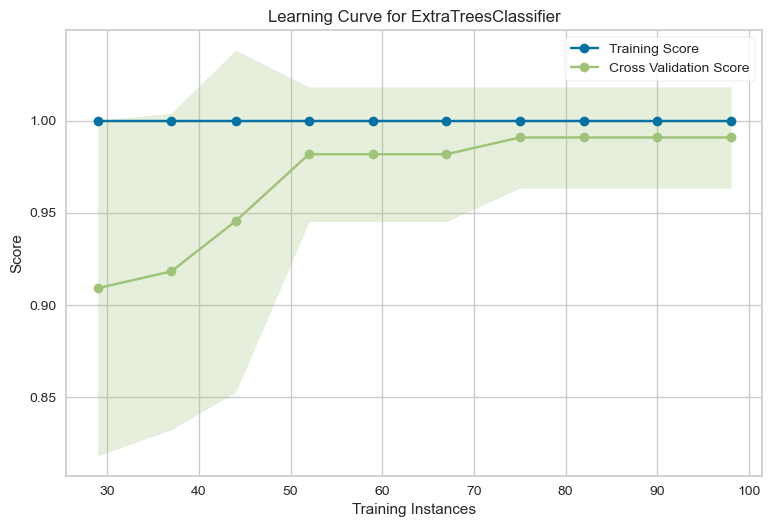

In [49]:
plot_model(my_model,plot = "learning")

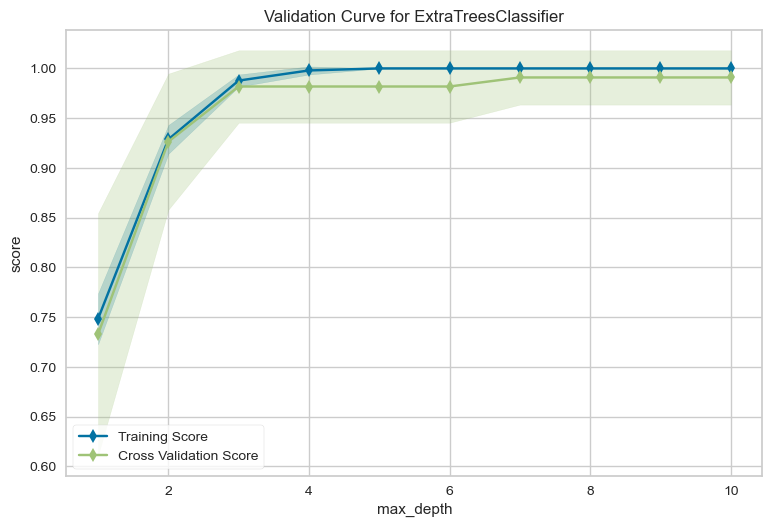

In [50]:
plot_model(my_model,plot = "vc")

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
et =ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
et.fit(x_train_res,y_train_res)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [52]:
import pickle

In [53]:
pickle.dump(et,open("model3.pkl","wb"))

In [54]:
mod = pickle.load(open("model3.pkl","rb"))

In [55]:
mod.predict(x_test)

array([0, 0, 1, 3, 0, 2, 0, 2, 3, 3, 3, 3, 0, 3, 1, 3, 1, 2, 3, 2, 0, 1])